Importation of modules and functions
===

In [1]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime

# Functions
from implementations import *
from helpers import *

Data loading
===

In [2]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")

Data filtering and standardization
===

In [3]:
(data_, labels, ids) = process_data(data_raw, labels_raw, ids_raw)
data = standardize(data_)

The original dimensions of the training data set was 250000 samples and 30 columns. After feature and sample filtering, there are 223877 samples and 23 columns


Splitting into train and test set
===

In [4]:
X_train, y_train, X_test, y_test = split_data(data, labels)

print('Standardized and randomized samples are found as the variables X_train, y_train, X_test, y_test. Values' +
      ' are split for testing and training sets with the ratio of 0.8')

Standardized and randomized samples are found as the variables X_train, y_train, X_test, y_test. Values are split for testing and training sets with the ratio of 0.8


Linear regression with gradient descent (GD)
===

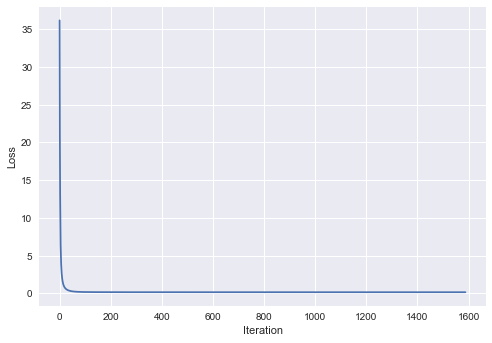

0.6252596314907872

In [5]:
initial_w = np.ones(X_train.shape[1])
losses, ws = least_squares_GD(y_train, X_train, initial_w)

plt.style.use('seaborn')
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

pred_y = predict_labels(ws[-1], X_test)
pred_accuracy(pred_y,y_test)

Linear regression using stochastic gradient descent (SGD)
===

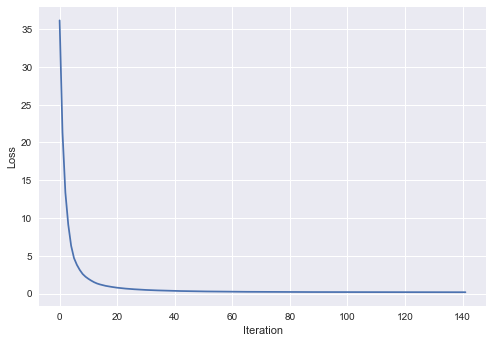

0.6306644332774987

In [6]:
initial_w = np.ones(X_train.shape[1])
losses, ws = least_squares_SGD(y_train, X_train, initial_w)

plt.style.use('seaborn')
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

pred_y = predict_labels(ws[-1], X_test)
pred_accuracy(pred_y,y_test)

Linear regression using least squares normal equations
===

In [7]:
w = least_squares(y_train, X_train)

pred_y = predict_labels(w, X_test)
pred_accuracy(pred_y,y_test)

0.6253713009491904

Linear regression using least squares normal equations and different polynomial degrees
===

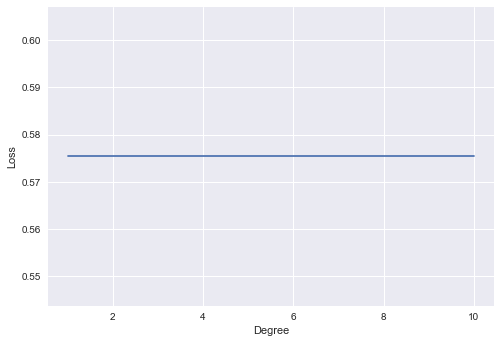

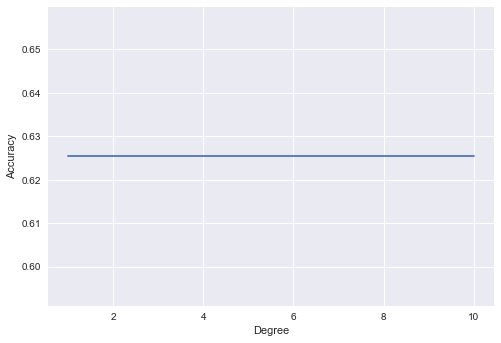

0.6253713009491904


In [8]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rmse = []
pred = []

for ind, degree in enumerate(degrees):
    w = polynomial_regression(y_train, X_train, degree)
    rmse.append(np.sqrt(2 * compute_loss(y_test, X_test, w)))
    pred_y = predict_labels(w, X_test)
    pred.append(pred_accuracy(pred_y,y_test))

plt.style.use('seaborn')
plt.plot(degrees,rmse)
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.plot(degrees,pred)
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.show()

print(np.max(pred))

Linear regression using ridge regression
===

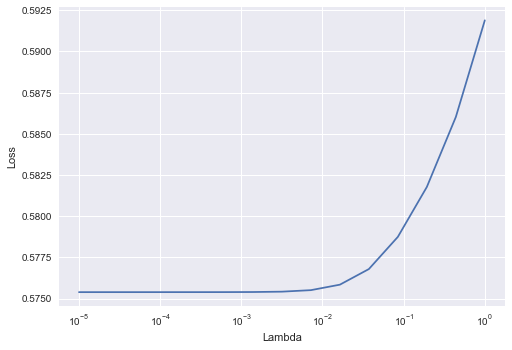

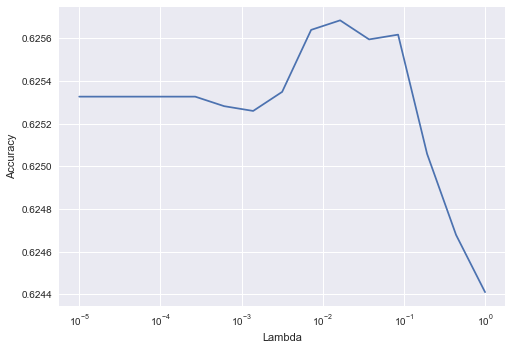

0.6256839754327191


In [9]:
lambdas = np.logspace(-5, 0, 15)
rmse = []
pred = []

for ind, lambda_ in enumerate(lambdas):
    
    w = ridge_regression(y_train, X_train, lambda_)
    rmse.append(np.sqrt(2 * compute_loss(y_test, X_test, w)))
    pred_y = predict_labels(w, X_test)
    pred.append(pred_accuracy(pred_y,y_test))
    
plt.style.use('seaborn')
plt.semilogx(lambdas,rmse)
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.show()

print(np.max(pred))